In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
# uploading datasets
dataset = pd.read_excel('/content/datasets.xls')
print(dataset.shape)

dataset.head()


(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


**Dividinng data into features(X) class(Y)**

In [ ]:
# removing id
X = dataset.iloc[1:,1:-1].values
Y = dataset.iloc[1:,-1].values

# change into int type  from float type
X = X.astype('int64')
Y = Y.astype('int64')

X[0]


array([20000,     2,     2,     1,    24,     2,     2,    -1,    -1,
          -2,    -2,  3913,  3102,   689,     0,     0,     0,     0,
         689,     0,     0,     0,     0])

In [ ]:
# labeling data 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])


In [ ]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,3])],remainder='passthrough')
X = np.array(ct.fit_transform(X))


**Spliting dataset into train and test dataset**

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.99,random_state=0) 

# X_train.shape
Y_train.shape

(300,)

**Data Normalization using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Traing the model usiinng Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
# accuracy on test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, Y_test)

acc = test_data_accuracy

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.7835353535353535


In [ ]:
from sklearn.metrics import confusion_matrix   
cf = confusion_matrix(Y_test,y_test_prediction)

In [ ]:
from sklearn.metrics import precision_score, recall_score,f1_score

pre = precision_score(Y_test, y_test_prediction)
rec = recall_score(Y_test, y_test_prediction)
f1 = f1_score(Y_test,y_test_prediction)

In [ ]:
# Result

print("Accuracy of Logistic :  ",acc)
print("Precision of Logistic : ", pre)
print("Recall  of Logistic : ",   rec)
print('F1 score of Logistic : ',f1)

Accuracy of Logistic :   0.7835353535353535
Precision of Logistic :  0.5405405405405406
Recall  of Logistic :  0.1519987840097279
F1 score of Logistic :  0.2372760707082691


In [ ]:
# confusion matrix

print("Confusion Matrix of Logistic")

print(cf)


Confusion Matrix of Logistic
[[22271   850]
 [ 5579  1000]]


(Text(32.09375, 0.5, 'True Class'), Text(0.5, 14.09375, 'Predicted Class'))

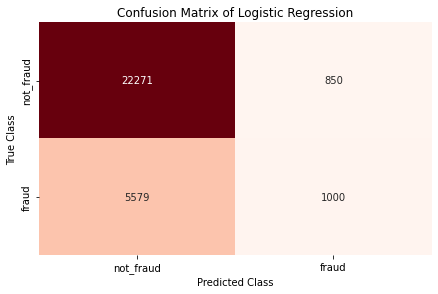

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cf = confusion_matrix(Y_test, y_test_prediction)
cm_logit = pd.DataFrame(cf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Reds", fmt = 'g')
plt.title("Confusion Matrix of Logistic Regression"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")